# 法国大革命期间的通货膨胀


## 概览

本讲描述了 {cite}`sargent_velde1995` 中所写的法国大革命（1789-1799）的一些货币和财政特征。

为了筹资公共开支和偿还债务，法国政府开始了一系列政策实验。

这些实验的设计者心中有关于政府货币和财政政策如何影响经济结果的理论。

其中一些关于货币和财政政策的理论至今仍然值得关注。

* 类似罗伯特·巴罗的**税收平滑**模型 {cite}`Barro1979`

* 这种规范性（即规定性）模式建议政府主要通过发行国债来为战时临时激增的支出提供资金，增加的税收也正好偿还战争期间发行的额外债务；然后，在战争结束后，将政府在战争期间积累的债务展期；并在战争结束后永久性地增加税收，增加的税收正好足够支付战后政府债务的利息。

* 类似于本讲中描述的**不愉快的货币主义方程** {doc}`unpleasant`
   
* 在 1789 年之前的几十年里，涉及复利的数学支配着法国政府的债务动态；据历史学家称，这种计算方式为法国大革命奠定了基础。

* 关于政府公开市场操作的影响的*真实票据*理论，其中政府用持有的有价值房地产或金融资产*支持*新发行的纸币，纸币持有者可以用他们的钱从政府购买这些资产。
    
    * 革命者们从亚当·斯密于1776年出版的《国富论》中了解到这一理论
    * 它塑造了革命者在1789年到1791年之间发行的一种名为 **assignats** 的纸币方式

* 经典的 **金本位** 或 **银本位**
  
    * 拿破仑·波拿巴于1799年成为法国政府首脑。他使用这一理论来指导他的货币和财政政策

* 一个经典的 **通货膨胀税** 理论，其中菲利普·凯根的需求货币研究 ({cite}`Cagan`) 是 {doc}`cagan_ree` 的一个核心

   * 这一理论有助于解释1794年至1797年的法国价格水平和货币供应数据

* 需求实际余额的 **法律限制** 或 **金融抑制** 理论
 
    * 公共安全委员会的十二个成员，他们在1793年6月至1794年7月期间管理恐怖时期，使用这一理论来塑造他们的货币政策

我们使用 `matplotlib` 复制 {cite}`sargent_velde1995` 描述这些实验结果的几个图表

## 数据来源

本讲使用了 {cite}`sargent_velde1995` 汇编的三个表格中的数据：
  * [datasets/fig_3.xlsx](https://github.com/QuantEcon/lecture-python-intro/blob/main/lectures/datasets/fig_3.xlsx)
  * [datasets/dette.xlsx](https://github.com/QuantEcon/lecture-python-intro/blob/main/lectures/datasets/dette.xlsx)
  * [datasets/assignat.xlsx](https://github.com/QuantEcon/lecture-python-intro/blob/main/lectures/datasets/assignat.xlsx)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

base_url = 'https://github.com/QuantEcon/lecture-python-intro/raw/'\
           + 'main/lectures/datasets/'

fig_3_url = f'{base_url}fig_3.xlsx'
dette_url = f'{base_url}dette.xlsx'
assignat_url = f'{base_url}assignat.xlsx'

## 政府开支与税收

我们将使用 `matplotlib` 构建几个图表，这些图表将提供重要的历史背景。

这些图表是 {cite}`sargent_velde1995` 中图表的翻版。

这些图表展示了在十八世纪期间：

 * 法国和英国的政府开支在四次大战期间都有激增，并且增幅相当
 * 在英国，和平时期的税收大约等于政府开支，
   但在战争期间，税收显著少于政府开支
 * 在法国，即使在和平时期，税收也显著少于政府开支

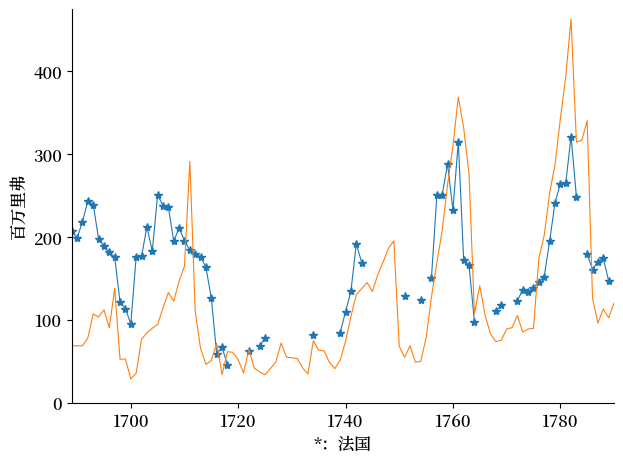

In [2]:
# 从Excel文件读取数据
data2 = pd.read_excel(dette_url, 
        sheet_name='Militspe', usecols='M:X', 
        skiprows=7, nrows=102, header=None)

# 法国军事开支，1685-1789年，以1726年的里弗尔计
data4 = pd.read_excel(dette_url, 
        sheet_name='Militspe', usecols='D', 
        skiprows=3, nrows=105, header=None).squeeze()
        
years = range(1685, 1790)

plt.figure()
plt.plot(years, data4, '*-', linewidth=0.8)

plt.plot(range(1689, 1791), data2.iloc[:, 4], linewidth=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(labelsize=12)
plt.xlim([1689, 1790])
plt.xlabel('*：法国')
plt.ylabel('百万里弗')
plt.ylim([0, 475])

plt.tight_layout()
plt.show()

18 世纪，英国和法国进行了四次大规模战争。

英国赢得了前三场战争，输掉了第四场战争。

每次战争都导致两国政府支出激增，而每个国家都必须以某种方式为这些支出提供资金。

图{numref}`fr_fig4`显示了法国（蓝色）和英国在这四场战争中军费开支的激增。

图{numref}`fr_fig4`的一个显著特点是，尽管英国的人口不到法国的一半，但其军费开支却与法国差不多。

这证明英国已经建立了能够维持高税收、政府支出和政府借贷的国家机构。参见{cite}`north1989`。

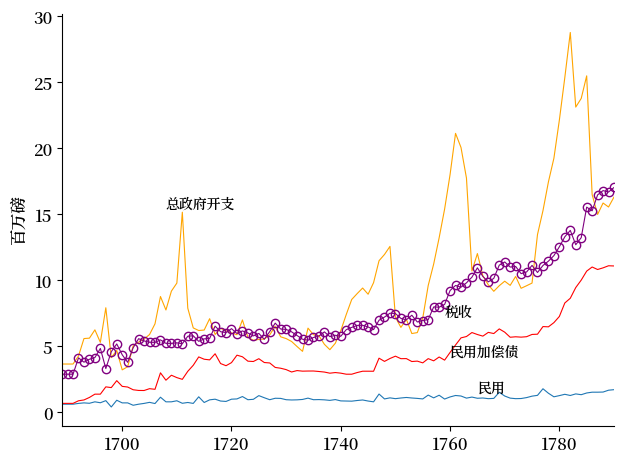

In [3]:
# 从Excel文件读取数据
data2 = pd.read_excel(dette_url, sheet_name='Militspe', usecols='M:X', 
                      skiprows=7, nrows=102, header=None)

# 绘制数据
plt.figure()
plt.plot(range(1689, 1791), data2.iloc[:, 5], linewidth=0.8)
plt.plot(range(1689, 1791), data2.iloc[:, 11], linewidth=0.8, color='red')
plt.plot(range(1689, 1791), data2.iloc[:, 9], linewidth=0.8, color='orange')
plt.plot(range(1689, 1791), data2.iloc[:, 8], 'o-', 
         markerfacecolor='none', linewidth=0.8, color='purple')

# 自定义图表
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(labelsize=12)
plt.xlim([1689, 1790])
plt.ylabel('百万磅', fontsize=12)

# 添加文本注释
plt.text(1765, 1.5, '民用', fontsize=10)
plt.text(1760, 4.2, '民用加偿债', fontsize=10)
plt.text(1708, 15.5, '总政府开支', fontsize=10)
plt.text(1759, 7.3, '税收', fontsize=10)

plt.tight_layout()
plt.show()

图{numref}`fr_fig2`和{numref}`fr_fig3`总结了1789年法国大革命开始前一个世纪英国和法国政府的财政政策。

1789年之前，法国的进步力量非常欣赏英国为政府支出提供资金的方式，并希望重新设计法国的财政安排，使其更像英国。

图{numref}`fr_fig2`显示了政府支出及其在以下各项支出中的分配情况 

   * 民事（非军事）活动
   * 偿债，即支付利息 
   * 军事支出（黄线减去红线） 

图{numref}`fr_fig2`还显示了政府从税收中获得的总收入（紫色圈线）

请注意，在这四场战争中，政府总支出的激增与军事支出的激增相关联
在这四场战争中

   * 18 世纪初反对法国国王路易十四的战争
   * 17 世纪 40 年代的奥地利王位继承战争
   * 17 世纪 50 年代和 60 年代的法印战争
   * 1775 年至 1783 年的美国独立战争

图{numref}`fr_fig2`显示

   * 和平时期，政府支出与税收大致持平，偿债支出既不增长也不下降
   * 战争时期，政府支出超过税收收入
      * 政府通过发行债务来弥补收入相对于支出的赤字
   * 战争结束后，政府的税收收入超过非利息支出的部分刚好足以偿还政府为弥补前期赤字而发行的债务
      * 因此，在战争结束后，政府不会增加税收来偿还债务
      * 相反，它只是将继承的债务滚动起来，增加的税收正好够偿还债务的利息支出

因此，图{numref}`fr_fig2`中描绘的18世纪英国财政政策非常像罗伯特·巴罗 {cite}`Barro1979`等*税收平滑*模型的教科书例子。 

该图的一个显著特点是税收与政府支出之间的 “重力法则”。

   * 政府支出水平与税收水平相互吸引
   * 虽然它们会暂时出现差异（战争期间就是如此），但当和平重现时，它们又会走到一起。

接下来，我们将绘制 18 世纪英国和法国的偿债成本占政府收入比例的数据。

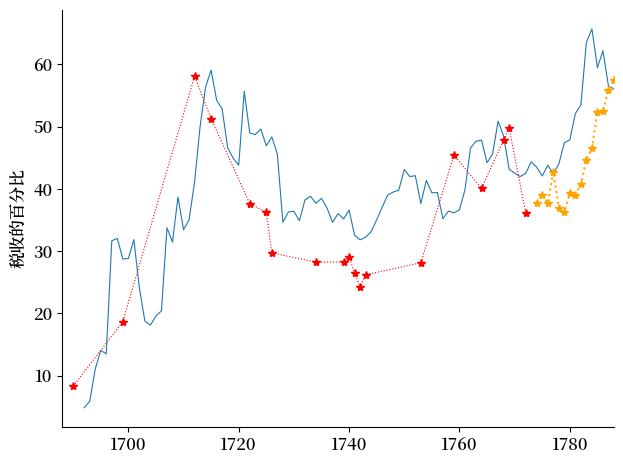

In [4]:
# 从Excel文件读取数据
data1 = pd.read_excel(dette_url, sheet_name='Debt', 
            usecols='R:S', skiprows=5, nrows=99, header=None)
data1a = pd.read_excel(dette_url, sheet_name='Debt', 
            usecols='P', skiprows=89, nrows=15, header=None)

# 绘制数据
plt.figure()
plt.plot(range(1690, 1789), 100 * data1.iloc[:, 1], linewidth=0.8)

date = np.arange(1690, 1789)
index = (date < 1774) & (data1.iloc[:, 0] > 0)
plt.plot(date[index], 100 * data1[index].iloc[:, 0], 
         '*:', color='r', linewidth=0.8)

# 绘制附加数据
plt.plot(range(1774, 1789), 100 * data1a, '*:', color='orange')

# 图表属性
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('white')
plt.gca().set_xlim([1688, 1788])
plt.ylabel('税收的百分比')

plt.tight_layout()
plt.show()

图{numref}`fr_fig1`显示，在英国和法国，政府债务的利息支出（即所谓的 “还本付息”）占政府税收收入的比例都很高。

{numref}`fr_fig2`向我们展示了在和平时期，尽管利息支出巨大，英国仍然能够平衡预算。

但正如我们在下一张图中看到的，在1788年法国大革命前夕，在英国行之有效的财政重力法则在法国并不奏效。

In [5]:
# 从 Excel 文件中读取数据
data1 = pd.read_excel(fig_3_url, sheet_name='Sheet1', 
          usecols='C:F', skiprows=5, nrows=30, header=None)

data1.replace(0, np.nan, inplace=True)

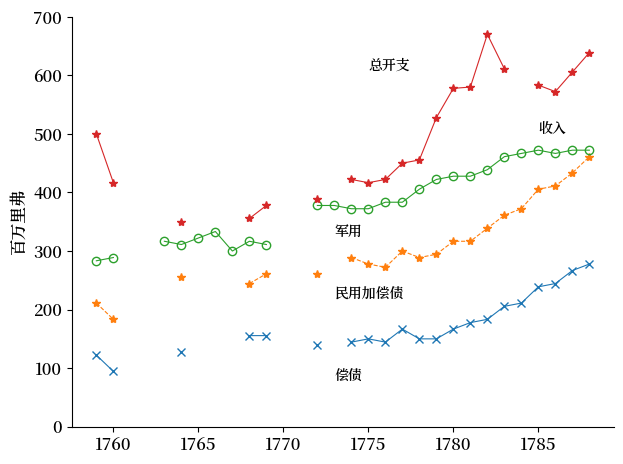

In [6]:
# Plot the data
plt.figure()

plt.plot(range(1759, 1789, 1), data1.iloc[:, 0], '-x', linewidth=0.8)
plt.plot(range(1759, 1789, 1), data1.iloc[:, 1], '--*', linewidth=0.8)
plt.plot(range(1759, 1789, 1), data1.iloc[:, 2], 
         '-o', linewidth=0.8, markerfacecolor='none')
plt.plot(range(1759, 1789, 1), data1.iloc[:, 3], '-*', linewidth=0.8)

plt.text(1775, 610, '总开支', fontsize=10)
plt.text(1773, 325, '军用', fontsize=10)
plt.text(1773, 220, '民用加偿债', fontsize=10)
plt.text(1773, 80, '偿债', fontsize=10)
plt.text(1785, 500, '收入', fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim([0, 700])
plt.ylabel('百万里弗')

plt.tight_layout()
plt.show()

{numref}`fr_fig3`显示，在1788年法国大革命前夕，政府支出超过了税收收入。  


特别是在法国帮助美国人从英国独立出来的战争期间及之后，不断增长的政府还本付息（即利息支出）造成了这种情况。

这在一定程度上是债务动态发展的结果，而债务动态 是接下来{doc}`unpleasant`的基础。

{cite}`sargent_velde1995`描述了直到1788年统治法国的古代政体的制度特征是如何使政府难以平衡预算的。

强大的利益争夺阻碍了政府缩小其总支出与税收之间的差距。
政府无法通过以下方式缩小总支出与税收之间的差距

 * 提高税收，或
 * 降低政府的非偿债（即非利息）支出，或 
 * 通过重新安排偿债期限，即拖欠部分债务来降低偿债（即利息）成本

法国的先例和现行安排使三个群体有权阻止对他们特别关心的政府预算约束的组成部分进行调整

* 纳税人
* 政府支出的受益人
* 政府债权人（即政府债券的所有者）

1720 年左右，法国国王路易十四发动战争后，法国政府也遇到了类似的情况。
战争导致债务危机后，法国政府在 1720 年左右面临类似情况时，牺牲了政府债权人（即政府债券所有者）的利益，即通过拖欠足够多的债务来减少利息支出，从而平衡预算。

不知何故，1789 年法国政府的债权人比 1720 年时更加强大。

因此，路易十六国王召集了全体议员，要求他们重新设计法国宪法，以降低政府开支或增加税收，从而使他既能平衡预算，又能减少债务。

{cite}`sargent_velde1995`描述法国大革命时期是如何实现这一目标的。

## 国有化、私有化、减债 

1789 年，革命党人迅速将议会改组为国民议会。

首要任务是解决财政危机，正是这种情况促使国王召开了国民议会。

革命党人不是社会主义者或共产主义者。

相反，他们尊重私有财产，了解最先进的经济学。 

他们知道，要偿还政府债务，就必须增加新的收入或减少支出。

巧合的是，天主教会拥有大量创收财产。 

事实上，根据这些收入流的资本化价值估算，教会土地的价值相当于 
约等于法国政府的全部债务。

这一巧合促成了偿还法国政府债务的三步走计划

 * 将教会土地国有化，即扣押或没收教会土地，但不支付任何费用
 * 出售教会土地 
 * 用出售所得偿还甚至清偿法国政府的债务

亚当·斯密在 1776 年出版的《国富论》一书中分析了他所谓的 “真实票据”，并阐述了这一计划所依据的货币理论，许多革命者都读过这本书。

亚当·斯密将 “真实纸币 ”定义为以生产资本或存货等真实资产为抵押的纸币。

国民议会为实施这一计划做出了巧妙的制度安排。

为了回应天主教主教塔列朗（一位无神论者）的动议，国民议会没收了教会的土地并将其收归国有。

国民议会打算用教会土地的收益来偿还国债。

为此，国民议会开始实施一项 “私有化计划”，以便在偿还债务的同时不增加税收。

他们的计划涉及发行名为“assignats”的纸币，持有者可以使用这些纸币购买国有土地。

这些纸币在某种程度上会“和银币一样好”，因为两者都可作为支付手段用于交换那些（曾经属于教会的）土地。

财政部长内克尔和国民议会的代表们因此计划通过创造一种新货币，来同时解决私有化问题*和*债务问题。

他们设计了一个通过拍卖没收的土地来筹集资金的方案，从而以政府出售土地为担保，回收已发行的纸币。

这种“税收支撑的货币”方案将国民议会推进到了当时的现代货币理论领域。

辩论记录显示国民议会的成员们如何通过理论和证据来评估这一创新的可能影响。

  * 国民议会的成员引用了大卫·休谟和亚当·斯密的观点
  * 他们提到了约翰·劳的1720年金融体系和十五年前美国的纸币经验，作为纸币计划可能出错的例子
  * 知道了这些陷阱，他们开始努力避免

他们的计划在两三年内取得了成功。

但之后，法国卷入了一场大规模的战争，战争扰乱了计划，使得法国纸币的性质发生了根本性的变化。{cite}`sargent_velde1995` 描述了发生的情况。

## 重塑税收制度与税务管理

1789年，法国革命者成立了国民议会，开始着手重塑法国的财政政策。

他们希望履行政府债务—法国政府的债权人在国民议会中有很强的代表性。

但他们开始着手重塑法国的税收制度和征税的行政机器。

  * 他们废除了许多税种
  * 他们废除了古老制度中的*税务承包*机制
    * 税务承包意味着政府将税收征收私有化，雇佣私人公民—所谓的税务承包商来征收税款，而承包商则保留一部分税款作为服务报酬
    * 伟大的化学家拉瓦锡也是一位税务承包商，这也是公共安全委员会在1794年将他送上断头台的原因之一

由于这些税收改革，政府税收收入下降。

下一幅图显示了这一情况。

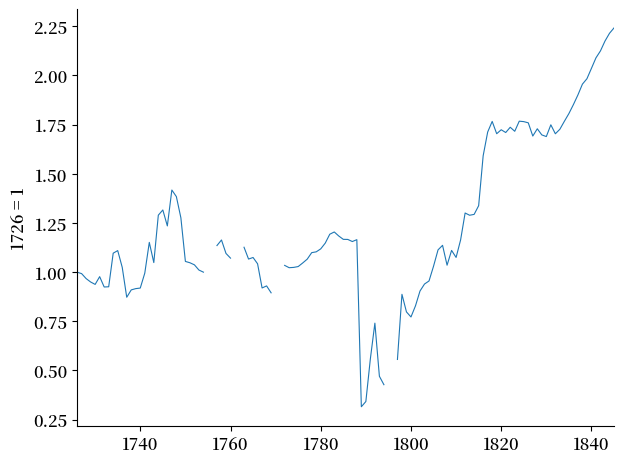

In [7]:
# 从Excel文件读取数据
data5 = pd.read_excel(dette_url, sheet_name='Debt', usecols='K', 
                    skiprows=41, nrows=120, header=None)

# 绘制数据
plt.figure()
plt.plot(range(1726, 1846), data5.iloc[:, 0], linewidth=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('white')
plt.gca().tick_params(labelsize=12)
plt.xlim([1726, 1845])
plt.ylabel('1726 = 1', fontsize=12)

plt.tight_layout()
plt.show()

根据 {numref}`fr_fig5`，人均税收收入在1789年之前的水平直到1815年后，拿破仑·波拿巴被流放到圣赫勒拿岛并且路易十八恢复法国王位后才得以回升。

* 从1799至1814年，拿破仑·波拿巴还有其他的收入来源—战利品和战争中打败的省份和国家支付的赔款
* 从1789至1799年，法国革命者寻求其他来源来筹集资源，以支付政府购买的货物和服务以及偿还法国政府债务。

如下图所示，在1789至1799年期间，政府开支大幅超过税收。

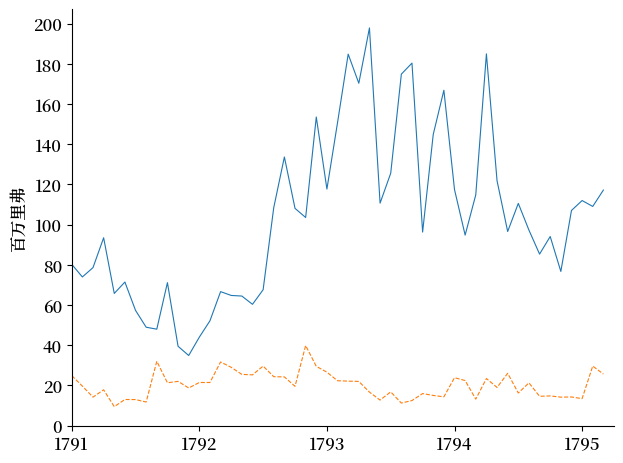

In [8]:
# 从Excel文件读取数据
data11 = pd.read_excel(assignat_url, sheet_name='Budgets',
        usecols='J:K', skiprows=22, nrows=52, header=None)

# 准备x轴数据
x_data = np.concatenate([
    np.arange(1791, 1794 + 8/12, 1/12),
    np.arange(1794 + 9/12, 1795 + 3/12, 1/12)
])

# 移除NaN数值
data11_clean = data11.dropna()

# 绘制数据
plt.figure()
h = plt.plot(x_data, data11_clean.values[:, 0], linewidth=0.8)
h = plt.plot(x_data, data11_clean.values[:, 1], '--', linewidth=0.8)

# 设置图表属性
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('white')
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.xlim([1791, 1795 + 3/12])
plt.xticks(np.arange(1791, 1796))
plt.yticks(np.arange(0, 201, 20))

# 设置y轴标签
plt.ylabel('百万里弗', fontsize=12)

plt.tight_layout()
plt.show()

面对这种财政困境，法国革命者通过多种方式弥补收支差额，其中一种方法是印发纸币并在市场上流通使用。

为了详细展示这一过程，我们下面将展示纸币的增发与各种商品和服务购买能力之间的关系，特别是军事物资和士兵的支付。

/tmp/ipykernel_5531/2936946460.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start='1790', periods=len(data12), freq='M'),
/tmp/ipykernel_5531/2936946460.py:15: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  plt.xticks(ticks=pd.date_range(start='1790',


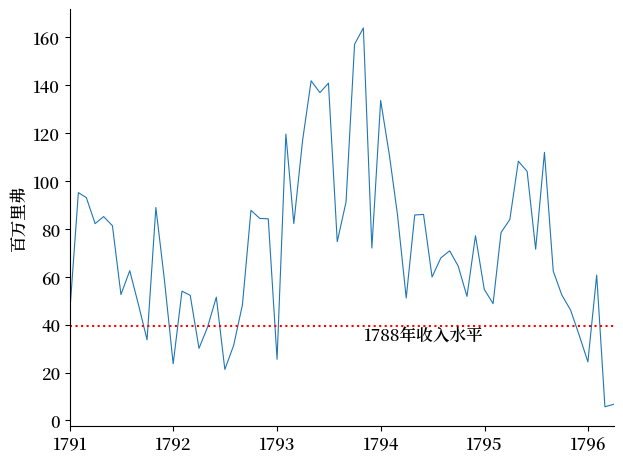

In [9]:
# 从Ｅxcel中读取数据
data12 = pd.read_excel(assignat_url, sheet_name='seignor', 
         usecols='F', skiprows=6, nrows=75, header=None).squeeze()

# 创建图表并绘制
plt.figure()
plt.plot(pd.date_range(start='1790', periods=len(data12), freq='M'),
         data12, linewidth=0.8)

# 设置图表属性
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(y=472.42/12, color='r', linestyle=':')
plt.xticks(ticks=pd.date_range(start='1790', 
           end='1796', freq='AS'), labels=range(1790, 1797))
plt.xlim(pd.Timestamp('1791'),
         pd.Timestamp('1796-02') + pd.DateOffset(months=2))
plt.ylabel('百万里弗', fontsize=12)
plt.text(pd.Timestamp('1793-11'), 39.5, '1788年收入水平', 
         verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.show()

{numref}`fr_fig24` 将 1789 年至 1796 年印钞所得的收入与古代政权在 1788 年获得的税收收入进行了比较。

以商品衡量，在 $t$ 时刻通过印制新钞所获得的收入等于

$$
\frac{M_{t+1} - M_t}{p_t}
$$

其中

* $M_t$ 是以里弗为单位的 在$t$ 时间的纸币存量
* $p_t$ 是在$t$ 时间每里弗的商品为单位的在 $t$ 时间的价格水平
* $M_{t+1} - M_t$ 是 在$t$ 时间的印制的新钞数量

请注意 1793-1794 年印钞所得收入激增。

* 这反映了公共安全委员会采取的强制公民接受纸币等的非常措施。

还要注意 1797 年之前收入的急剧下降以及 1797 年之后下降的结束。

* 这反映了使用印刷机增加收入的结束。

法国纸币持有者的权利随着时间的推移发生了有趣的变化。

这些导致了随时间变化的结果，并说明了指导革命者货币政策决策的理论在实践中发挥作用。

下图显示了革命者使用纸币为部分支出提供资金期间法国的价格水平。

请注意，我们使用对数刻度，因为价格水平上涨了很多。

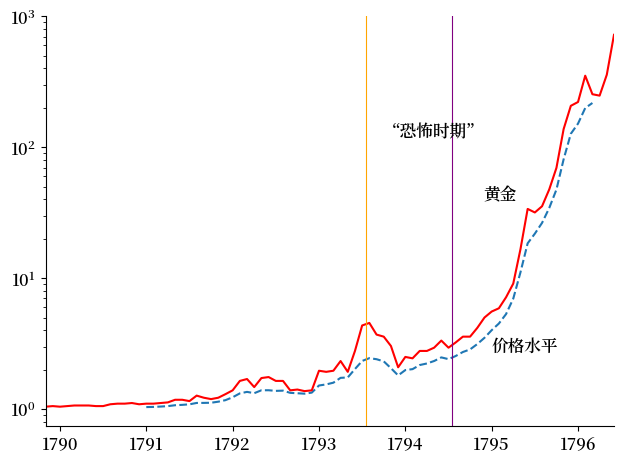

In [10]:
# Read the data from Excel file
data7 = pd.read_excel(assignat_url, sheet_name='Data', 
          usecols='P:Q', skiprows=4, nrows=80, header=None)
data7a = pd.read_excel(assignat_url, sheet_name='Data', 
          usecols='L', skiprows=4, nrows=80, header=None)
# Create the figure and plot
plt.figure()
x = np.arange(1789 + 10/12, 1796 + 5/12, 1/12)
h, = plt.plot(x, 1. / data7.iloc[:, 0], linestyle='--')
h, = plt.plot(x, 1. / data7.iloc[:, 1], color='r')

# Set properties of the plot
plt.gca().tick_params(labelsize=12)
plt.yscale('log')
plt.xlim([1789 + 10/12, 1796 + 5/12])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add vertical lines
plt.axvline(x=1793 + 6.5/12, linestyle='-', linewidth=0.8, color='orange')
plt.axvline(x=1794 + 6.5/12, linestyle='-', linewidth=0.8, color='purple')

# Add text
plt.text(1793.75, 120, '“恐怖时期”', fontsize=12)
plt.text(1795, 2.8, '价格水平', fontsize=12)
plt.text(1794.9, 40, '黄金', fontsize=12)


plt.tight_layout()
plt.show()

我们已经将显示价格水平对数的 {numref}`fr_fig9` 和下方绘制实际余额 $\frac{M_t}{p_t}$ 的 {numref}`fr_fig8` 划分为三个时期，分别对应不同的货币实验或 *制度*。

第一个时期结束于 1793 年夏末，其特点是实际余额不断增长，通货膨胀温和。

第二个时期始于恐怖时期，也以恐怖时期结束。其特点是实际余额较高，约为 25 亿，价格大致稳定。1794 年 7 月下旬罗伯斯庇尔的倒台开启了我们的第三个时期，其中实际余额下降，价格迅速上涨。


我们用不同的理论来解释这三个事件

* *背书*或*真实票据*理论（该理论的经典文本是亚当·斯密{cite}`smith2010wealth`）
* 法律限制理论（{cite}`keynes1940pay`，{cite}`bryant1984price`）
* 经典恶性通货膨胀理论（{cite}`Cagan`）
*
```{note}
根据{cite}`Cagan`采用的恶性通货膨胀的经验定义，
从通货膨胀率超过每月 50% 的月份开始，到通货膨胀率降至每月 50% 以下的月份结束，至少持续一年，*assignat* 从 1795 年 5 月到 12 月经历了恶性通货膨胀。
```

我们并不将这些理论视为竞争对手，而是将其视为关于政府票据发行的“如果-那么”的集合，每个理论都有其更接近现实条件的地方—即更接近满足”如果“的地方。

/tmp/ipykernel_5531/1750161514.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  h = plt.plot(pd.date_range(start='1789-11-01', periods=len(data7), freq='M'),


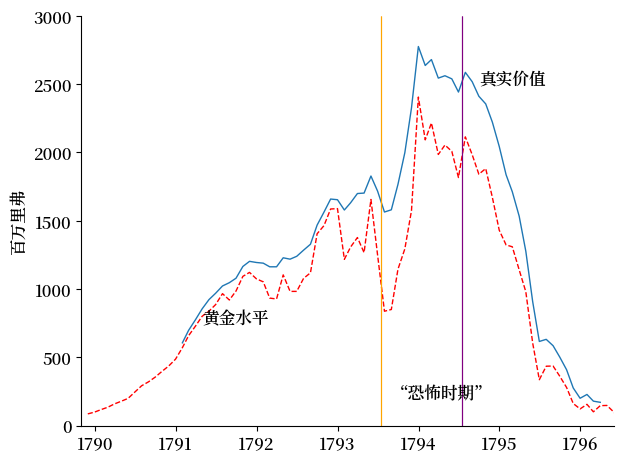

In [11]:
# Read the data from Excel file
data7 = pd.read_excel(assignat_url, sheet_name='Data', 
        usecols='P:Q', skiprows=4, nrows=80, header=None)
data7a = pd.read_excel(assignat_url, sheet_name='Data', 
        usecols='L', skiprows=4, nrows=80, header=None)

# Create the figure and plot
plt.figure()
h = plt.plot(pd.date_range(start='1789-11-01', periods=len(data7), freq='M'), 
            (data7a.values * [1, 1]) * data7.values, linewidth=1.)
plt.setp(h[1], linestyle='--', color='red')

plt.vlines([pd.Timestamp('1793-07-15'), pd.Timestamp('1793-07-15')], 
           0, 3000, linewidth=0.8, color='orange')
plt.vlines([pd.Timestamp('1794-07-15'), pd.Timestamp('1794-07-15')], 
           0, 3000, linewidth=0.8, color='purple')

plt.ylim([0, 3000])

# Set properties of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('white')
plt.gca().tick_params(labelsize=12)
plt.xlim(pd.Timestamp('1789-11-01'), pd.Timestamp('1796-06-01'))
plt.ylabel('百万里弗', fontsize=12)

# Add text annotations
plt.text(pd.Timestamp('1793-09-01'), 200, '“恐怖时期”', fontsize=12)
plt.text(pd.Timestamp('1791-05-01'), 750, '黄金水平', fontsize=12)
plt.text(pd.Timestamp('1794-10-01'), 2500, '真实价值', fontsize=12)

plt.tight_layout()
plt.show()

图{numref}`fr_fig104`中的三个聚集点描绘了不同的实际余额-通货膨胀关系。

只有第三个时期的点具有我们现在熟悉的二十世纪恶性通货膨胀的逆向关系。

* 子时期 1：（“*真实票据*时期）：1791 年 1 月至 1793 年 7 月

* 子时期 2：（“恐怖时期”）：1793 年 8 月 - 1794 年 7 月

* 子时期 3：（“经典凯根恶性通货膨胀”）：1794 年 8 月 - 1796 年 3 月

In [12]:
def fit(x, y):

    b = np.cov(x, y)[0, 1] / np.var(x)
    a = y.mean() - b * x.mean()

    return a, b

In [13]:
# 加载数据
caron = np.load('datasets/caron.npy')
nom_balances = np.load('datasets/nom_balances.npy')

infl = np.concatenate(([np.nan], 
      -np.log(caron[1:63, 1] / caron[0:62, 1])))
bal = nom_balances[14:77, 1] * caron[:, 1] / 1000

In [14]:
# 为三个时期回归 y 对 x
a1, b1 = fit(bal[1:31], infl[1:31])
a2, b2 = fit(bal[31:44], infl[31:44])
a3, b3 = fit(bal[44:63], infl[44:63])

# 为三个时期回归 x 对 y
a1_rev, b1_rev = fit(infl[1:31], bal[1:31])
a2_rev, b2_rev = fit(infl[31:44], bal[31:44])
a3_rev, b3_rev = fit(infl[44:63], bal[44:63])

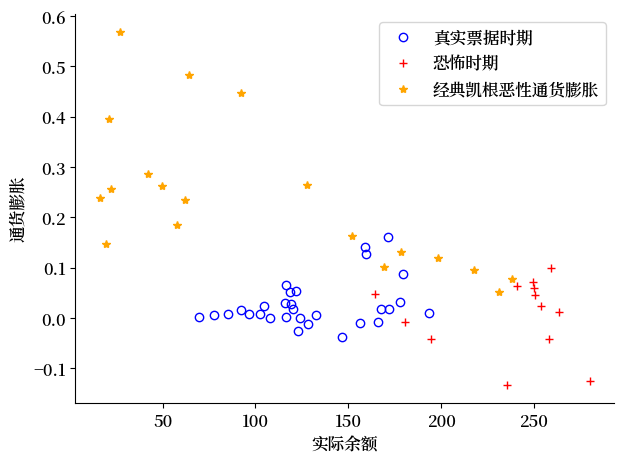

In [15]:
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 第一个子样本
plt.plot(bal[1:31], infl[1:31], 'o', markerfacecolor='none', 
         color='blue', label='真实票据时期')

# 第二个子样本
plt.plot(bal[31:44], infl[31:44], '+', color='red', label='恐怖时期')

# 第三个子样本
plt.plot(bal[44:63], infl[44:63], '*', 
        color='orange', label='经典凯根恶性通货膨胀')

plt.xlabel('实际余额')
plt.ylabel('通货膨胀')
plt.legend()

plt.tight_layout()
plt.show()

在 {numref}`fr_fig104` 中三个点云明显代表了不同的实际余额-通货膨胀关系。

只有第三个时期的点云显示了我们现在从二十世纪的恶性通货膨胀中熟悉的反向关系。

为了突出这一点，我们将使用线性回归绘制直线来压缩我们三个子时期的通货膨胀-实际余额关系。

在这样做之前，我们将删除恐怖时期早期的一些观察值，并绘制以下的图。

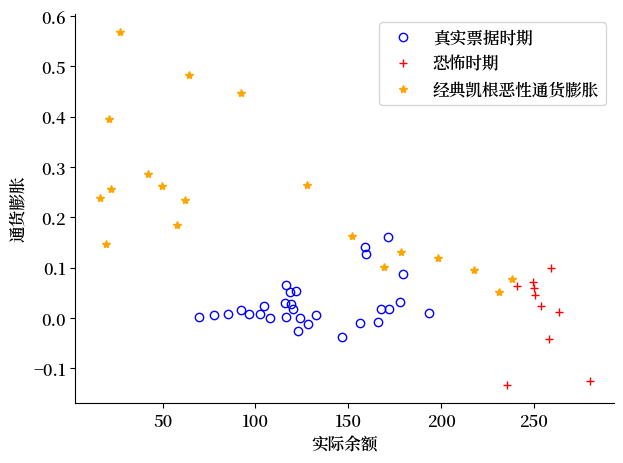

In [16]:
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 第一个子样本
plt.plot(bal[1:31], infl[1:31], 'o', markerfacecolor='none', color='blue', label='真实票据时期')

# 第二个子样本
plt.plot(bal[34:44], infl[34:44], '+', color='red', label='恐怖时期')

# 第三个子样本
plt.plot(bal[44:63], infl[44:63], '*', color='orange', label='经典凯根恶性通货膨胀')

plt.xlabel('实际余额')
plt.ylabel('通货膨胀')
plt.legend()

plt.tight_layout()
plt.show()

现在让我们回归*真实票据*时期的通货膨胀对实际余额，并绘制回归线。

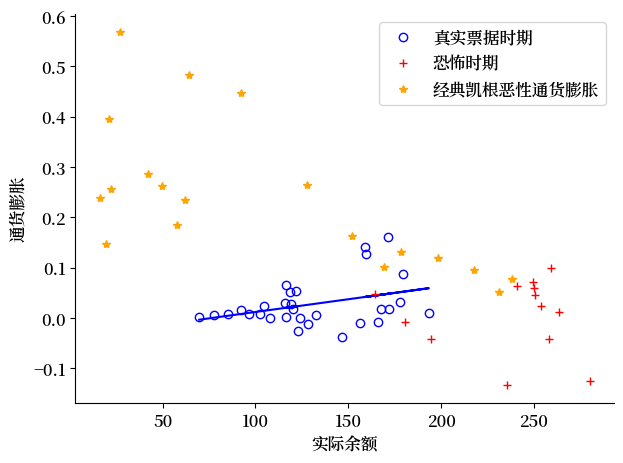

In [17]:
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 第一个子样本
plt.plot(bal[1:31], infl[1:31], 'o', markerfacecolor='none', 
        color='blue', label='真实票据时期')
plt.plot(bal[1:31], a1 + bal[1:31] * b1, color='blue')

# 第二个子样本
plt.plot(bal[31:44], infl[31:44], '+', color='red', label='恐怖时期')

# 第三个子样本
plt.plot(bal[44:63], infl[44:63], '*', 
        color='orange', label='经典凯根恶性通货膨胀')

plt.xlabel('实际余额')
plt.ylabel('通货膨胀')
plt.legend()

plt.tight_layout()
plt.show()

在 {numref}`fr_fig104c` 中的回归线显示，政府票据（纸币）的大幅增长只伴随着价格水平的适度上升，这一结果与*真实票据*理论相符。

在这段时期，政府票据是对教会土地的索赔。

但在这段时期的末尾，随着政府继续印制货币但停止出售教会土地，价格水平开始上升和实际余额开始下降。

为了让民众持有这种纸币，政府使用法律限制强制民众持有。

现在让我们在恐怖时期对实际余额进行回归，并绘制回归线。

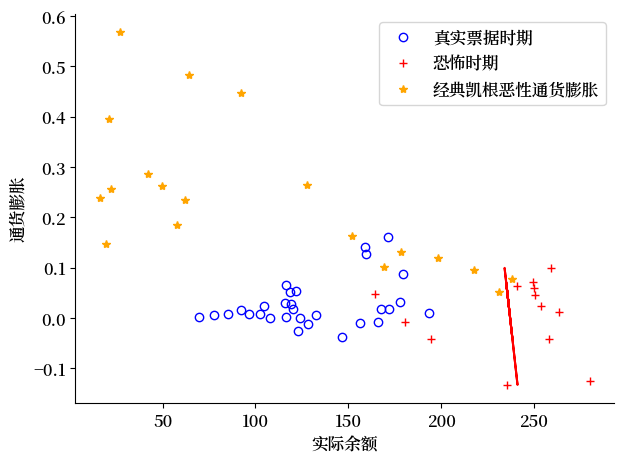

In [18]:
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 第一个子样本
plt.plot(bal[1:31], infl[1:31], 'o', markerfacecolor='none', 
        color='blue', label='真实票据时期')

# 第二个子样本
plt.plot(bal[31:44], infl[31:44], '+', color='red', label='恐怖时期')
plt.plot(a2_rev + b2_rev * infl[31:44], infl[31:44], color='red')

# 第三个子样本
plt.plot(bal[44:63], infl[44:63], '*', 
        color='orange', label='经典凯根恶性通货膨胀')

plt.xlabel('实际余额')
plt.ylabel('通货膨胀')
plt.legend()

plt.tight_layout()
plt.show()

在 {numref}`fr_fig104d` 中的回归线显示，在*恐怖*时期，政府票据（纸币）的大幅增加与价格水平的少量上升甚至是价格下降相伴随。

这反映出在恐怖时期，法律限制—财政压制—运作得很好。

但是恐怖时期在1794年7月结束。这导致了大规模的通货膨胀，因为人们试图找到其他交易和储存价值的方式。

下面的两个图表是关于经典恶性通货膨胀时期的。

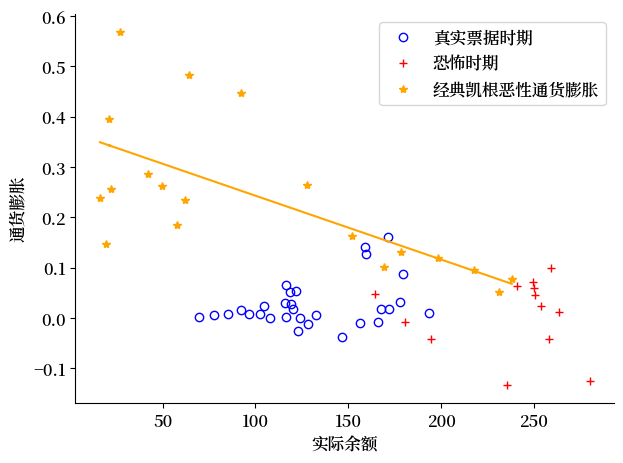

In [19]:
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 第一个子样本
plt.plot(bal[1:31], infl[1:31], 'o', markerfacecolor='none', 
        color='blue', label='真实票据时期')

# 第二个子样本
plt.plot(bal[31:44], infl[31:44], '+', color='red', label='恐怖时期')

# 第三个子样本
plt.plot(bal[44:63], infl[44:63], '*', 
    color='orange', label='经典凯根恶性通货膨胀')
plt.plot(bal[44:63], a3 + bal[44:63] * b3, color='orange')
plt.xlabel('实际余额')
plt.ylabel('通货膨胀')
plt.legend()
plt.tight_layout()
plt.show()

一个是以实际余额为因素，通货膨胀为结果进行回归的，另一个是以通货膨胀为因素，实际余额为结果进行回归的。

两者都显示了一个明显的反向关系，这是凯根 {cite}`Cagan` 研究的恶性通货膨胀的特征。
{numref}`fr_fig104e` 展示了在超通货膨胀期间，对实际余额对通货膨胀进行回归的结果。

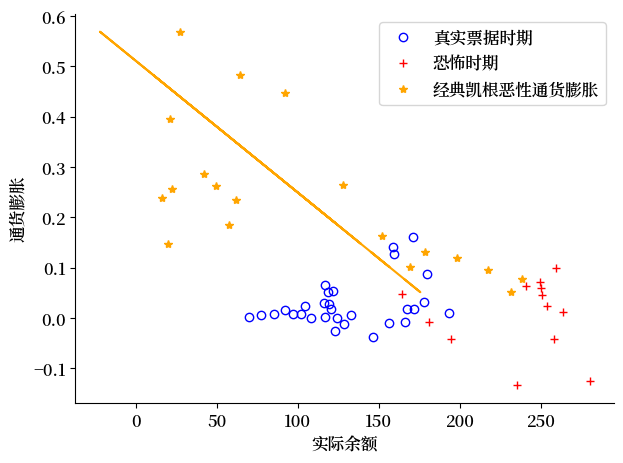

In [20]:
plt.figure()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 第一个子样本
plt.plot(bal[1:31], infl[1:31], 'o', 
    markerfacecolor='none', color='blue', label='真实票据时期')

# 第二个子样本
plt.plot(bal[31:44], infl[31:44], '+', color='red', label='恐怖时期')

# 第三个子样本
plt.plot(bal[44:63], infl[44:63], '*', 
        color='orange', label='经典凯根恶性通货膨胀')
plt.plot(a3_rev + b3_rev * infl[44:63], infl[44:63], color='orange')

plt.xlabel('实际余额')
plt.ylabel('通货膨胀')
plt.legend()

plt.tight_layout()
plt.show()

{numref}`fr_fig104e` 展示了在超通货膨胀期间，对通货膨胀对实际余额进行回归的结果。

## 超通货膨胀终结

{cite}`sargent_velde1995` 记载，1797年革命政府突然终止了通货膨胀，通过

  * 否认了2/3的国家债务，并因此
  * 消除了政府的净利息赤字
  * 停止印刷货币，而是
  * 使用金币和银币作为货币

1799年，拿破仑·波拿巴成为首席执政官，并在接下来的15年使用掠夺的地区资源帮助支付法国政府的开支。

## 理论基础

本讲为研究通货膨胀理论以及导致其的政府货币和财政政策做了铺垫。

这里描述了一个*货币主义的价格水平理论*，我们会在在 {doc}`cagan_ree` 中了解更多。

本讲也为 {doc}`money_inflation` 和 {doc}`unpleasant` 做了铺垫。